In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

     ---------------------------------------- 1.4/1.4 MB 8.4 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('book.csv')

In [3]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df.shape

(2000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
df.sample(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
506,0,0,0,1,0,0,0,0,0,0,0
1900,1,0,1,0,0,0,1,1,0,0,1
616,0,0,0,0,0,0,1,0,0,0,0
1191,0,0,0,0,0,0,0,0,0,0,0
1292,1,1,1,0,0,1,1,1,0,0,0
357,1,0,0,0,0,0,1,0,0,0,0
1942,1,1,0,0,0,0,0,0,0,0,0
1995,0,0,1,0,0,1,1,1,0,1,1
1674,0,0,0,0,0,0,0,0,0,0,0
1438,1,1,1,1,1,1,1,0,0,0,0


In [7]:
!pip install wordcloud


C:\Users\HP\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


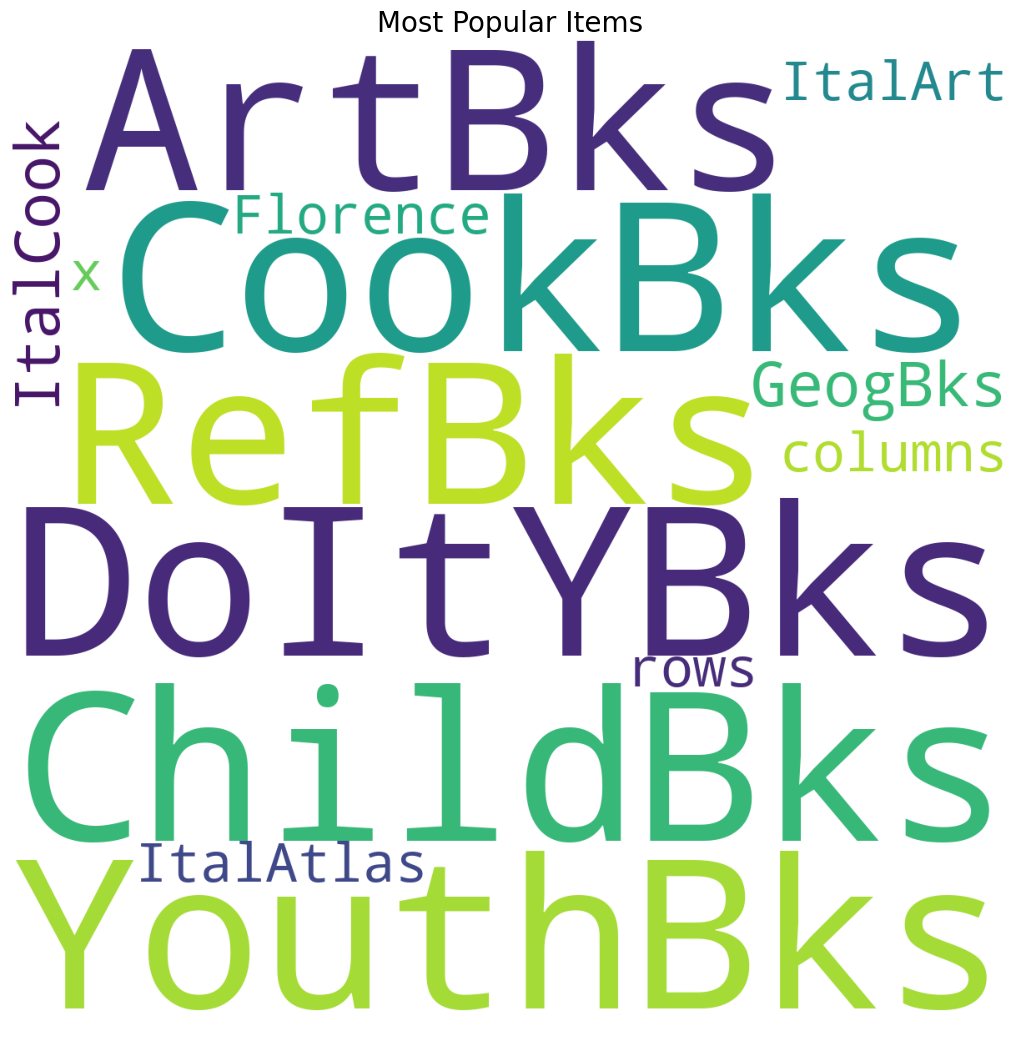

In [8]:
# Word cloud of most frequent books
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

<BarContainer object of 11 artists>

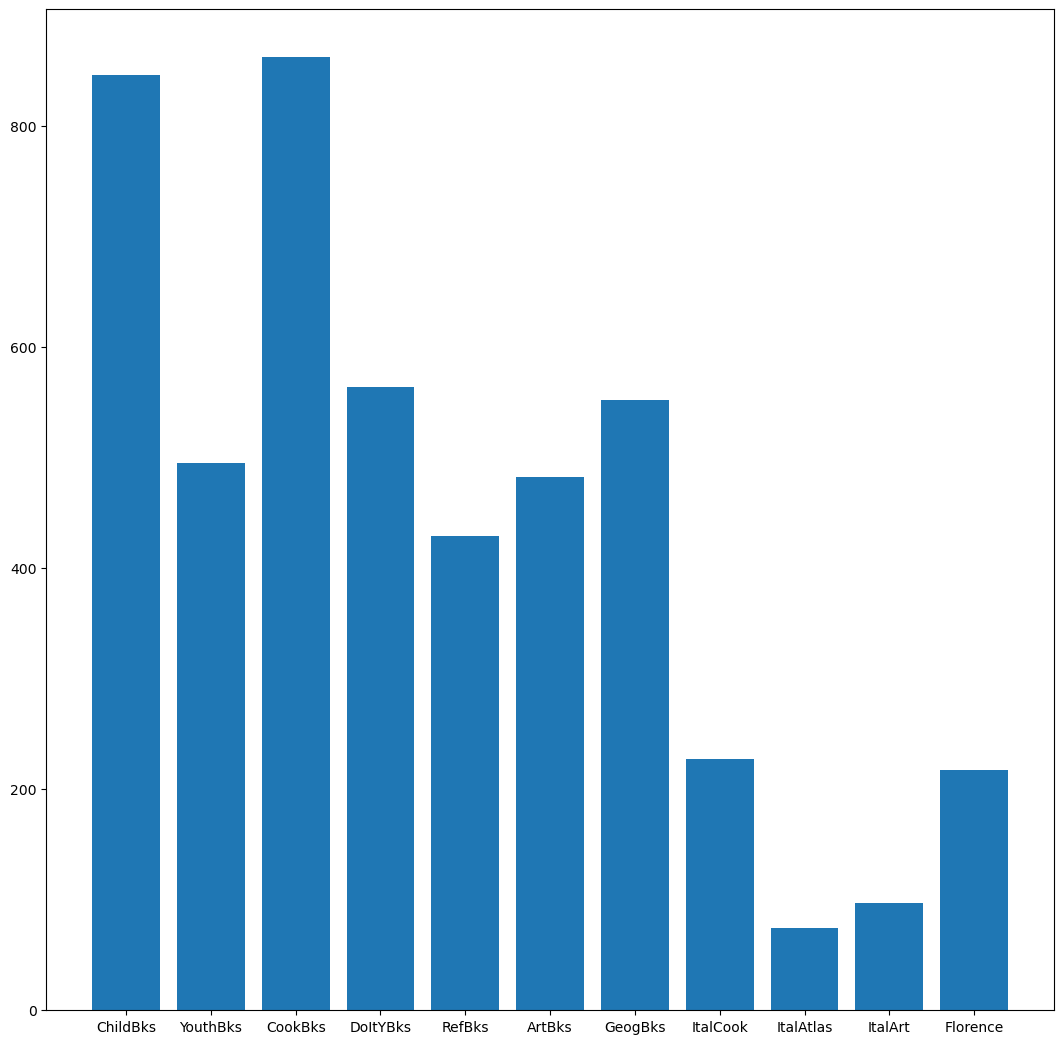

In [9]:
book_count = []
col_names = df.columns
for col_name in col_names:
    book_count.append(df[col_name].value_counts()[1])
    
plt.bar(col_names, book_count)

In [10]:
frequent_itemsets1 = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets1 

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [11]:
frequent_itemsets1 = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [12]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [13]:
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


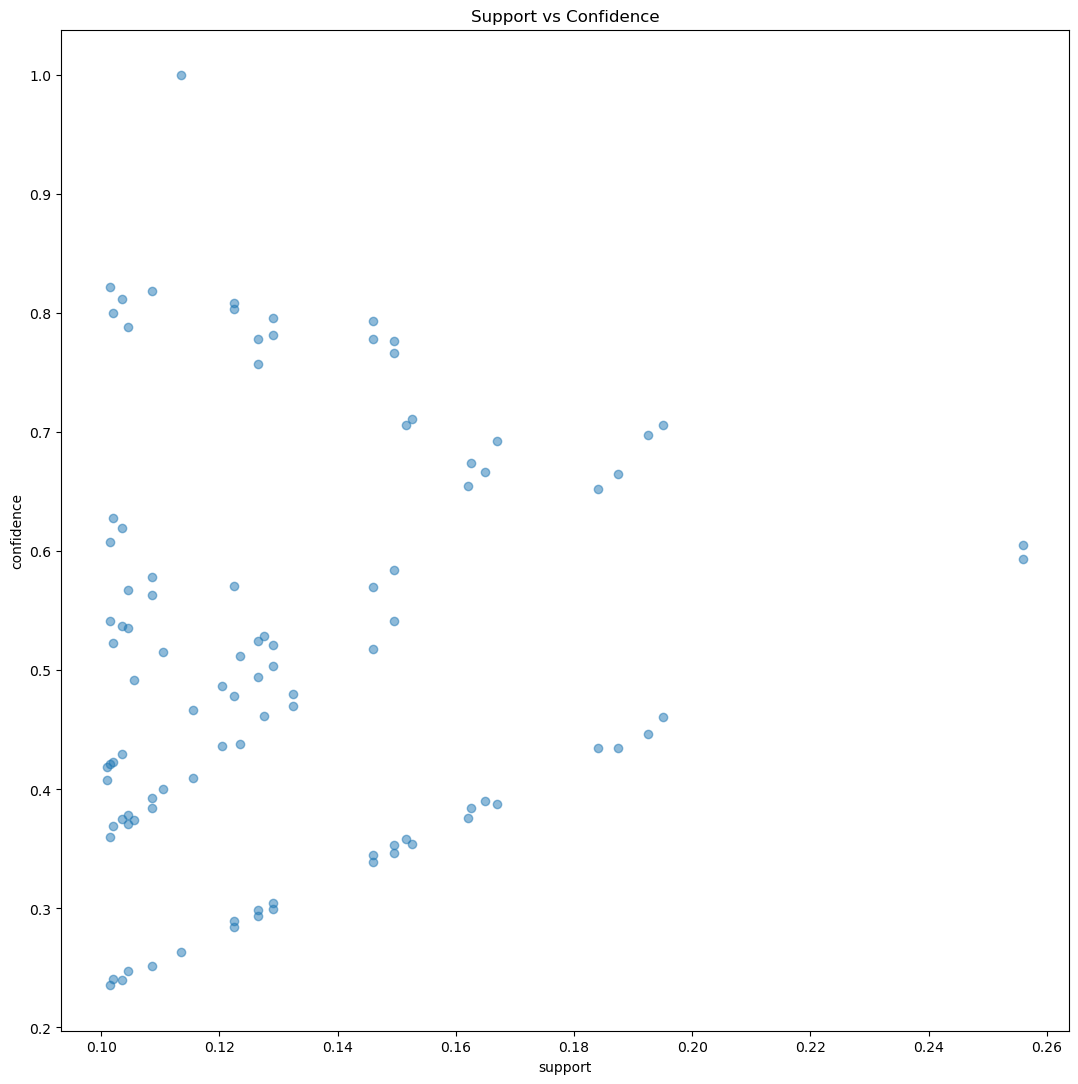

In [14]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [15]:
rules2 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303


In [16]:
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
42,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
45,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
47,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
25,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
24,"(CookBks, RefBks)",(ChildBks),0.1525,0.4230,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
38,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.4230,0.1020,0.800000,1.891253,0.048067,2.885000,0.540115
16,"(YouthBks, CookBks)",(ChildBks),0.1620,0.4230,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
22,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
36,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.4230,0.1045,0.788679,1.864490,0.048452,2.730446,0.534479


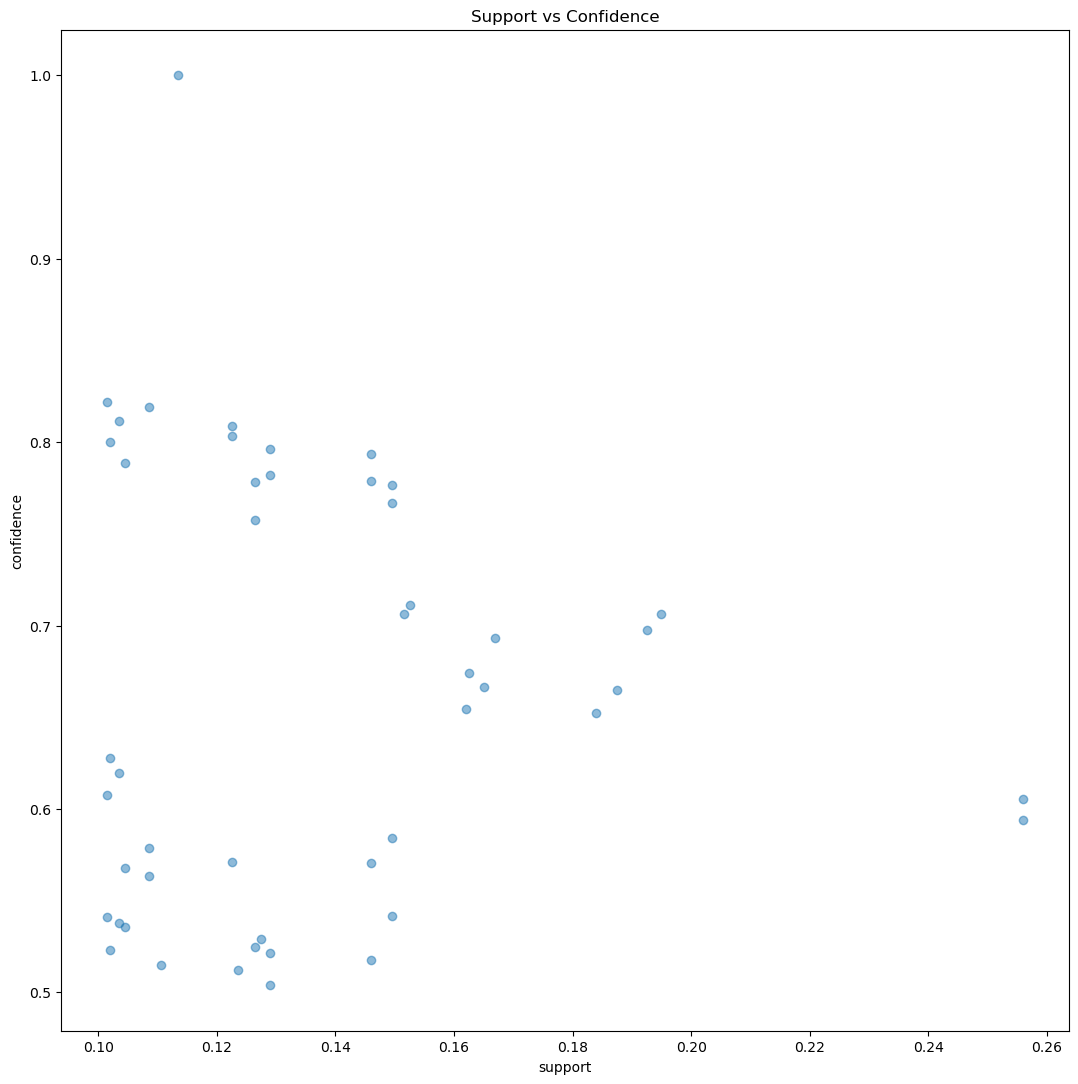

In [17]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [18]:
#Apriori_Algorithm for min_support = 0.2)

In [19]:
frequent_itemsets2 = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets2

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [20]:
frequent_itemsets2 = apriori(df, min_support = 0.2, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [21]:
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


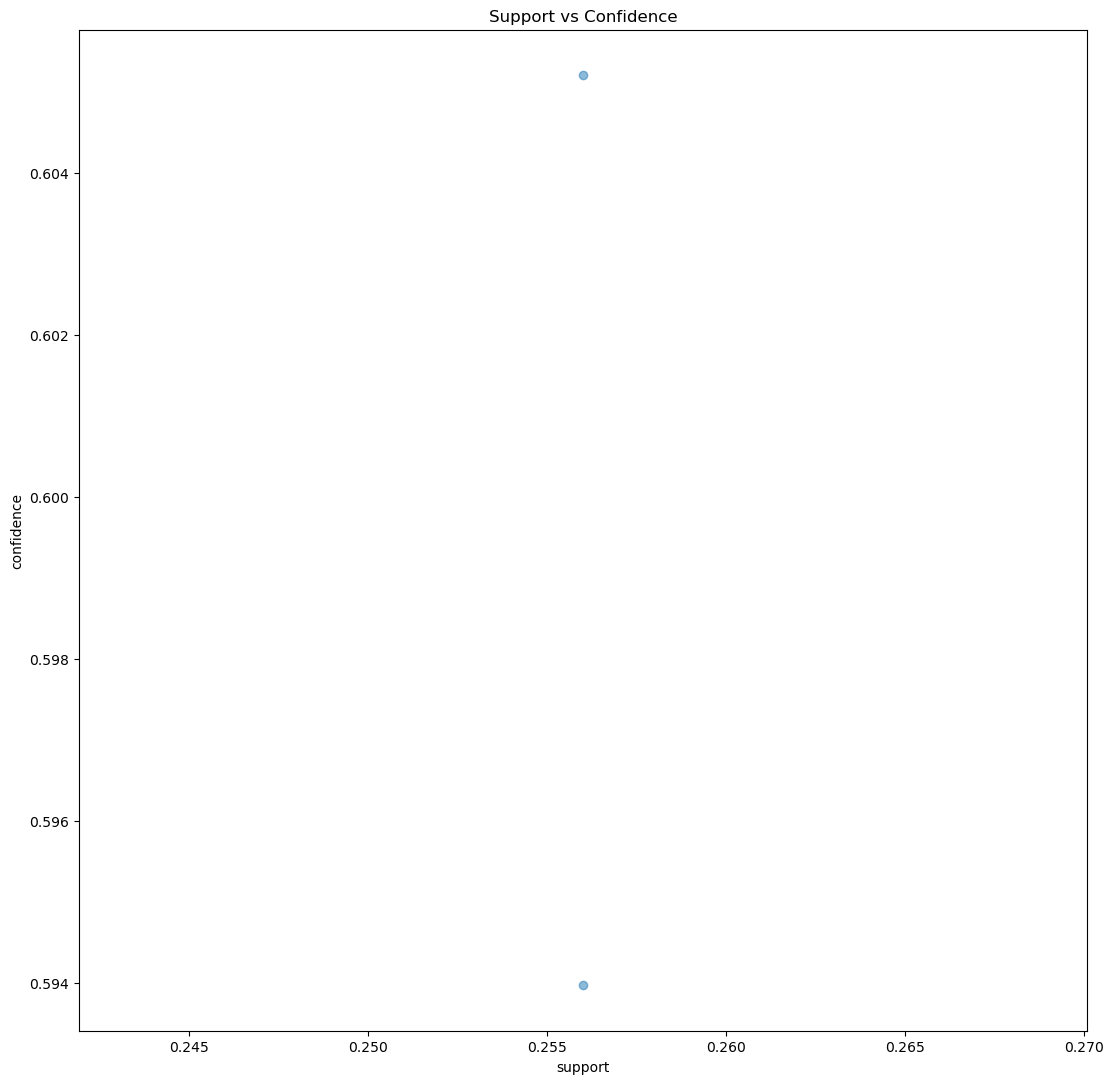

In [22]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [23]:
rules4 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [24]:
rules4 = rules4.sort_values(['confidence', 'lift'], ascending =[False, False])
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


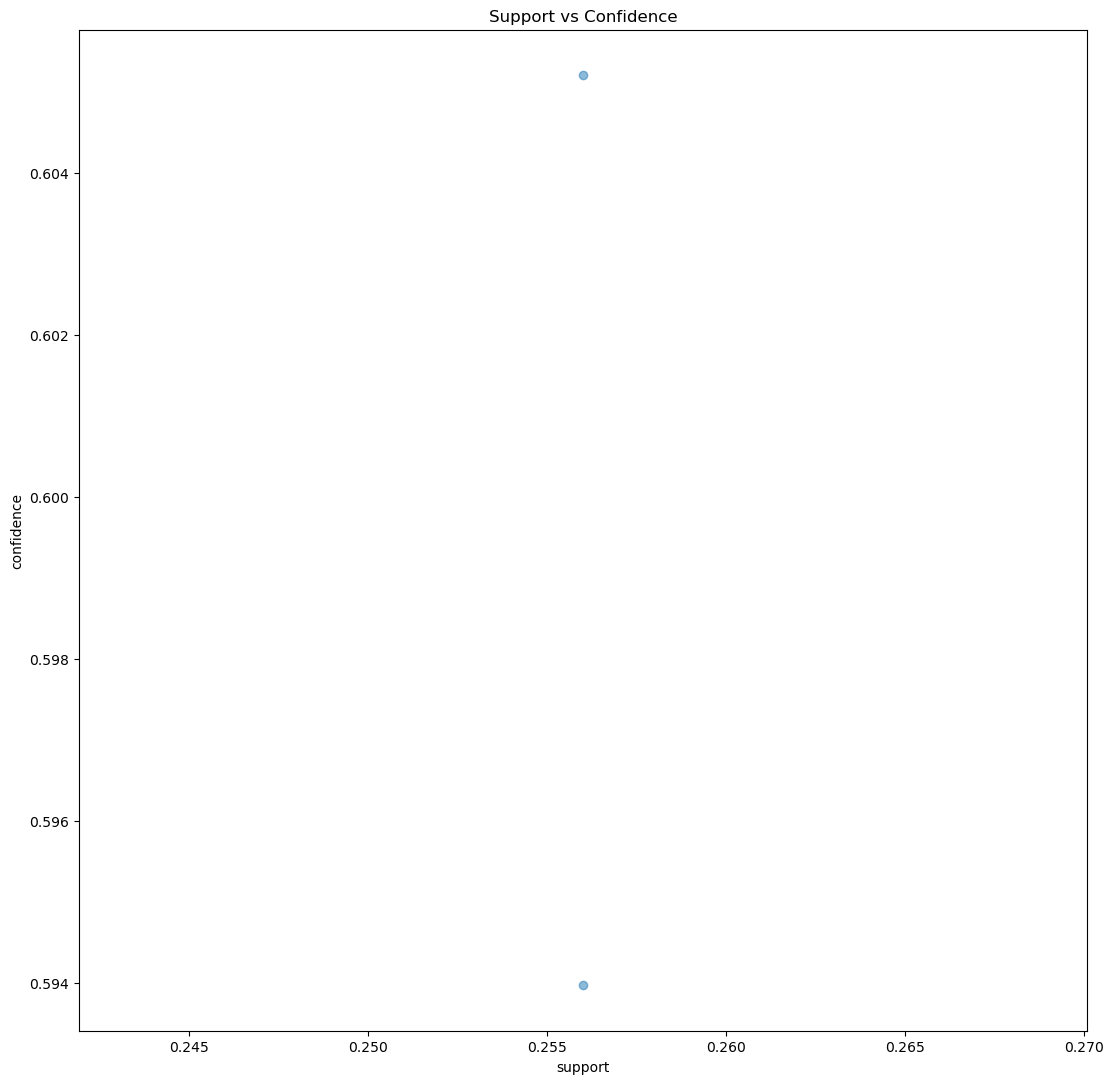

In [25]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()